没启动Nginx之前, 可以ping通服务器的ip地址, 也可以ping通域名(已经把ip加到域名的A类DNS records中了). 

但是就是在浏览器中输入ip地址或者域名就会显示无法连接服务, 注意你输入一个不存在的ip的时候, 显示的是找不到服务器. 

分析浏览器输入ip地址后, 发送的是http的get指令, http是80端口, 服务器的防火墙未必允许这个端口了, 另外服务器也是个电脑装个操作系统呀, 你直接http访问怎么能行, 谁来处理http请求? 我们写Java还知道Spring里集成了tomcat来处理http请求呢, 那为什么可以ping通呢? 问这个问题就说明你又忘了网络的基础知识了, ping是基于ICMP协议的, 能ping通只能说明目的电脑的网络(TCP/IP)是通的, ICMP属于IP层协议. 

Nginx也是个处理http请求的东西, 咱们查查它是个啥,

> NGINX is open source software for web serving, reverse proxying, caching, load balancing, media streaming, and more. It started out as a web server designed for maximum performance and stability. In addition to its HTTP server capabilities, NGINX can also function as a proxy server for email (IMAP, POP3, and SMTP) and a reverse proxy and load balancer for HTTP, TCP, and UDP servers. https://www.nginx.com/resources/glossary/nginx/


> Ping works by sending an Internet Control Message Protocol (ICMP) Echo Request to a specified interface on the network and waiting for a reply. When a ping command is issued, a ping signal is sent to a specified address. When the target host receives the echo request, it responds by sending an echo reply packet.

在服务器安装并启动Nginx之后便可以在浏览器访问了, 其实这么说并不专业, 应该说可以接受http请求了, `http://shaowenzhu.top` 是可以访问的了, 但是`https://shaowenzhu.top`仍显示无法连接服务器, 这可能和SSL有关系(比如我的域名没买证书或者我服务器没有监听8080端口, 可以查查服务器怎么使能8080端口), 然后别忘了http是`80`端口, https是`8080`端口. 


看在浏览器输入`http://shaowenzhu.top`, 便可以访问了~

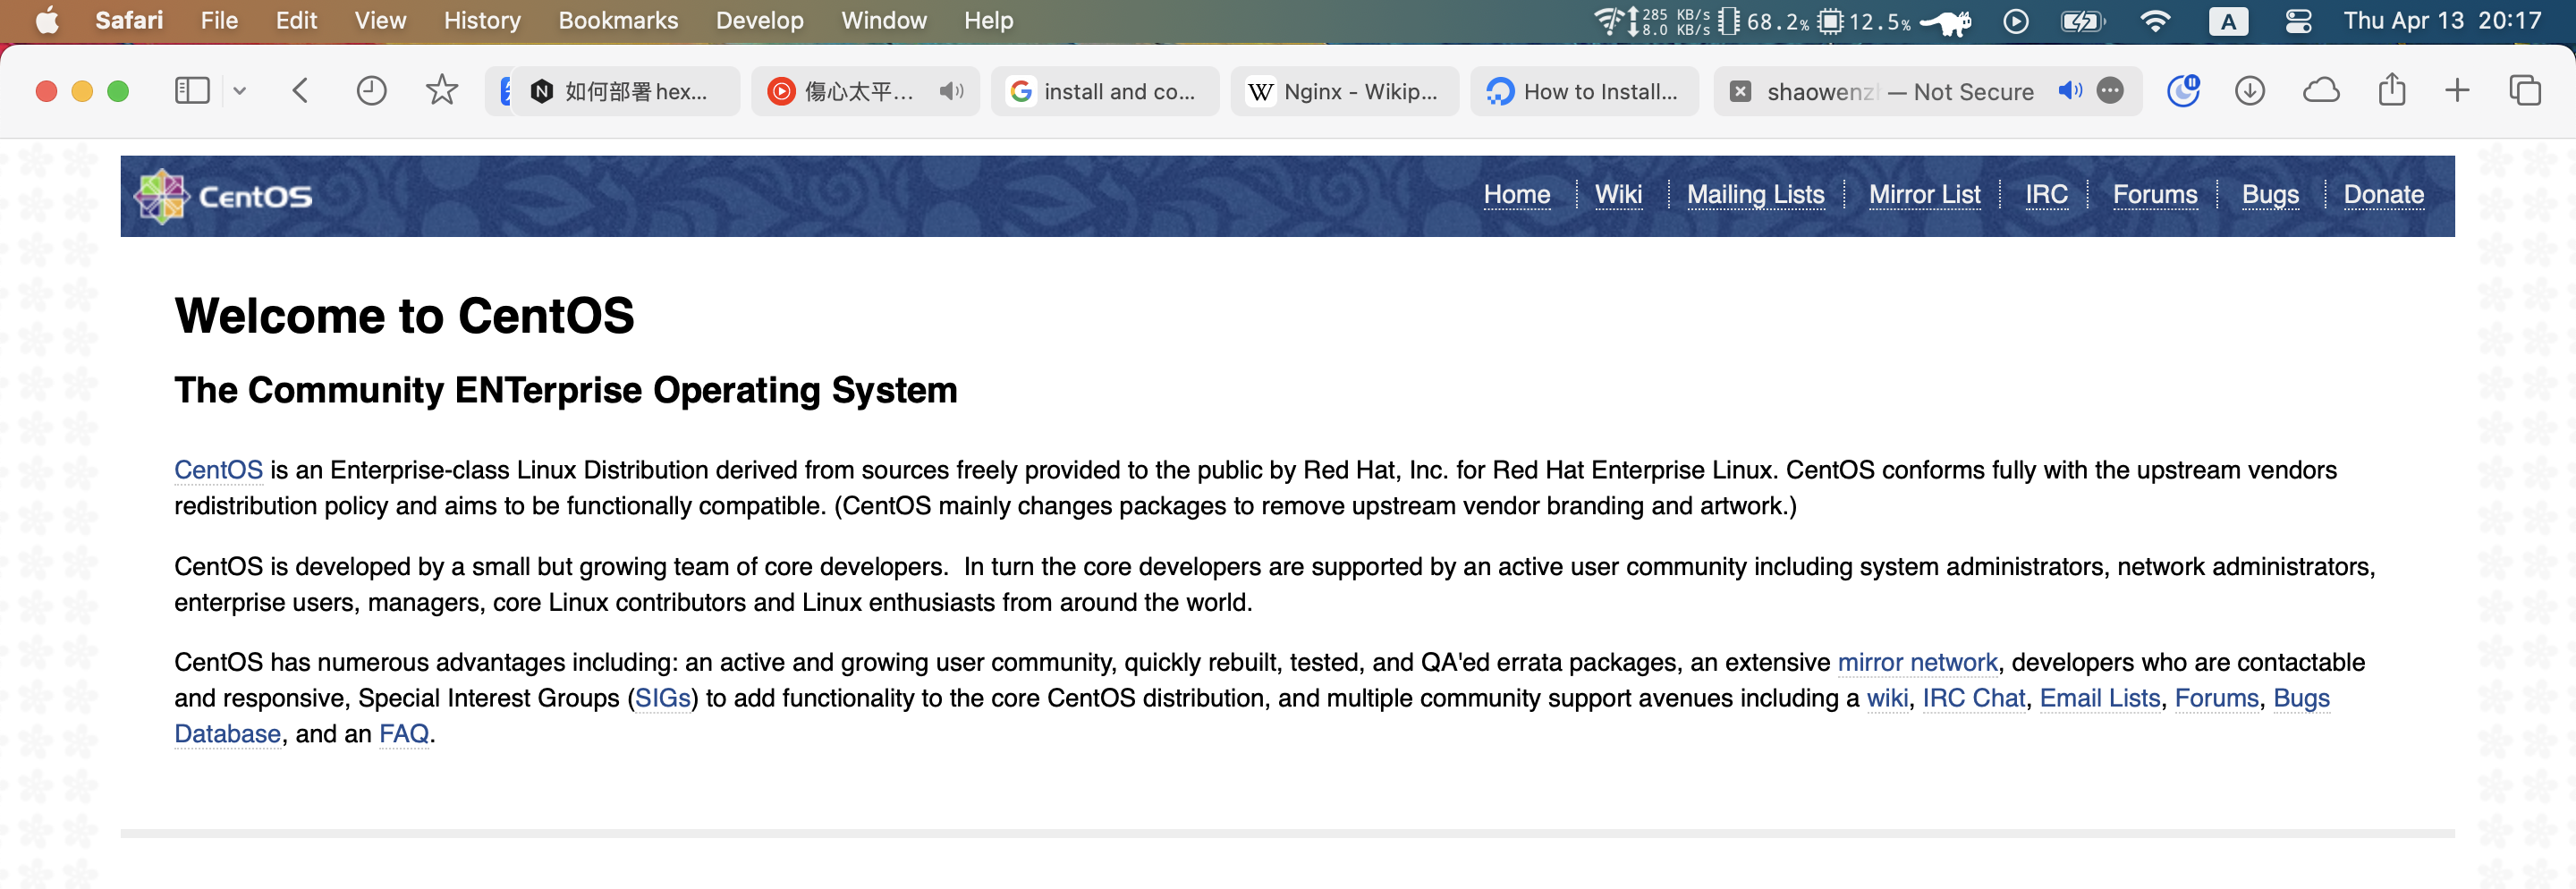

### 1. Installing the Nginx Web Server
----

```zsh
sudo yum install nginx

sudo systemctl enable nginx
sudo systemctl start nginx
```

### 2. Adjusting Firewall Rules
---

Run the following command to permanently enable HTTP connections on port 80:

```shell
sudo firewall-cmd --permanent --add-service=http
```

To verify that the http firewall service was added correctly, you can run:

```shell
sudo firewall-cmd --permanent --list-all
```

You’ll see output like this:

```zsh
public
  target: default
  icmp-block-inversion: no
  interfaces: 
  sources: 
  services: cockpit dhcpv6-client http ssh
  ports: 
  protocols: 
  masquerade: no
  forward-ports: 
  source-ports: 
  icmp-blocks: 
  rich rules: 
```

To apply the changes, you’ll need to reload the firewall service:

```zsh
sudo firewall-cmd --reload
```

### 3. Checking your Web Server

You can now test if your Nginx web server is up and running by accessing your server’s public IP address or domain name from your web browser.

If you do not have a domain name pointed at your server and you do not know your server’s public IP address, you can find it by running the following command:

```
ip addr show eth0 | grep inet | awk '{ print $2; }' | sed 's/\/.*$//'
```


参考:

- https://www.digitalocean.com/community/tutorials/how-to-install-nginx-on-centos-8